# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = 'data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
# Note: because of a version problem with matplot lib, the following line of code doesn't work in this workspace.
# pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

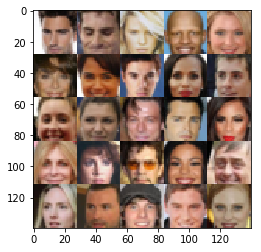

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.8.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    #return None, None, None
    
    inputs_real = tf.placeholder(tf.float32, shape=(None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, shape=(None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")
    
    return inputs_real, inputs_z, learning_rate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28 x 28 x out_channel_dim
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        # Flatten it
        flat = tf.reshape(relu2, (-1, 7*7*128))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    # rrm - I continue to wonder how I'm supposed to know how to do certain things in implementation
    # without reading test case code. I don't know how I would have known to negate is_train for reuse
    # value without failing unit tests several times, then actually reading unit test code to get
    # assertion cases. Still not sure where in directions above that it specifies the rule for reuse.
    with tf.variable_scope('generator', reuse=(not is_train)):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x256 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='same')
        # 28 x 28 x out_channel_dim now
        
        out = tf.tanh(logits)
        
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    #print("t_vars: {}".format(t_vars))
    
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [24]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model

    print("data_shape: {}".format(data_shape))
    print("data_image_mode: {}".format(data_image_mode))

    samples, losses = [], []
    
#    tf.reset_default_graph()

    # Create the network (using class template from DCGAN project)
    print("data_shape: {}".format(data_shape))
    print("data_image_mode: {}".format(data_image_mode))
    
    image_width, image_height, image_channels = data_shape[1], data_shape[2], data_shape[3]

    input_real, input_z, t_learning_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            batch_num = 0
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                #print("batch_images.shape: {}".format(batch_images.shape))
                
                batch_num += 1

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, t_learning_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, t_learning_rate: learning_rate})

                if batch_num % printLossEvery == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Batch {}...".format(batch_num),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if batch_num % showOutputEvery == 0:
                    show_generator_output(sess, numImagesOutput, input_z, image_channels, data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

data_shape: (60000, 28, 28, 1)
data_image_mode: L
data_shape: (60000, 28, 28, 1)
data_image_mode: L
Epoch 1/5... Batch 20... Discriminator Loss: 0.6760... Generator Loss: 1.0351
Epoch 1/5... Batch 40... Discriminator Loss: 1.5302... Generator Loss: 0.6025
Epoch 1/5... Batch 60... Discriminator Loss: 1.6439... Generator Loss: 0.7456
Epoch 1/5... Batch 80... Discriminator Loss: 1.2675... Generator Loss: 0.8561
Epoch 1/5... Batch 100... Discriminator Loss: 1.0772... Generator Loss: 0.8938


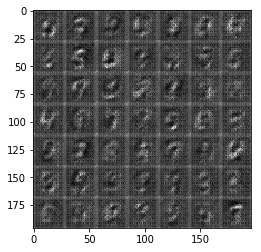

Epoch 1/5... Batch 120... Discriminator Loss: 1.0527... Generator Loss: 0.6485
Epoch 1/5... Batch 140... Discriminator Loss: 0.6871... Generator Loss: 1.3495
Epoch 1/5... Batch 160... Discriminator Loss: 1.0890... Generator Loss: 0.6165
Epoch 1/5... Batch 180... Discriminator Loss: 1.3129... Generator Loss: 1.0785
Epoch 1/5... Batch 200... Discriminator Loss: 0.4726... Generator Loss: 1.5644


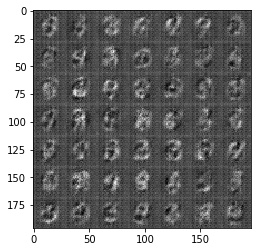

Epoch 1/5... Batch 220... Discriminator Loss: 0.6447... Generator Loss: 1.3513
Epoch 1/5... Batch 240... Discriminator Loss: 0.7860... Generator Loss: 1.2861
Epoch 1/5... Batch 260... Discriminator Loss: 0.6326... Generator Loss: 1.4336
Epoch 1/5... Batch 280... Discriminator Loss: 0.7062... Generator Loss: 1.0942
Epoch 1/5... Batch 300... Discriminator Loss: 0.6809... Generator Loss: 1.4234


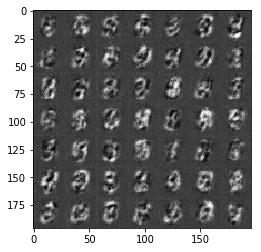

Epoch 2/5... Batch 20... Discriminator Loss: 0.5318... Generator Loss: 1.7068
Epoch 2/5... Batch 40... Discriminator Loss: 0.5866... Generator Loss: 1.6923
Epoch 2/5... Batch 60... Discriminator Loss: 0.7880... Generator Loss: 1.8295
Epoch 2/5... Batch 80... Discriminator Loss: 0.5589... Generator Loss: 1.9757
Epoch 2/5... Batch 100... Discriminator Loss: 0.4247... Generator Loss: 2.1965


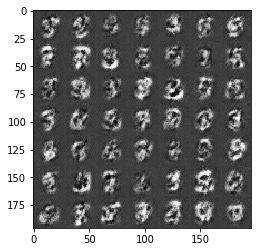

Epoch 2/5... Batch 120... Discriminator Loss: 0.7305... Generator Loss: 0.9768
Epoch 2/5... Batch 140... Discriminator Loss: 0.6876... Generator Loss: 2.7765
Epoch 2/5... Batch 160... Discriminator Loss: 0.4791... Generator Loss: 2.6836
Epoch 2/5... Batch 180... Discriminator Loss: 0.7869... Generator Loss: 3.3308
Epoch 2/5... Batch 200... Discriminator Loss: 0.4112... Generator Loss: 1.7042


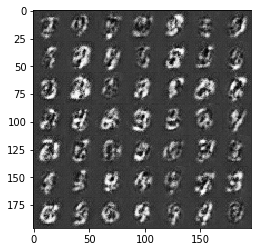

Epoch 2/5... Batch 220... Discriminator Loss: 0.4221... Generator Loss: 1.4266
Epoch 2/5... Batch 240... Discriminator Loss: 0.4062... Generator Loss: 3.0122
Epoch 2/5... Batch 260... Discriminator Loss: 0.4003... Generator Loss: 3.5149
Epoch 2/5... Batch 280... Discriminator Loss: 0.3621... Generator Loss: 3.1401
Epoch 2/5... Batch 300... Discriminator Loss: 0.3051... Generator Loss: 3.4465


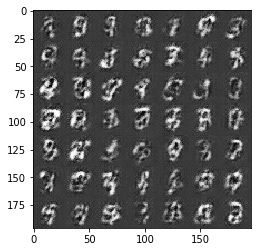

Epoch 3/5... Batch 20... Discriminator Loss: 0.2735... Generator Loss: 2.1660
Epoch 3/5... Batch 40... Discriminator Loss: 0.2767... Generator Loss: 2.3560
Epoch 3/5... Batch 60... Discriminator Loss: 0.4278... Generator Loss: 1.7721
Epoch 3/5... Batch 80... Discriminator Loss: 0.3068... Generator Loss: 2.5614
Epoch 3/5... Batch 100... Discriminator Loss: 0.2377... Generator Loss: 3.7453


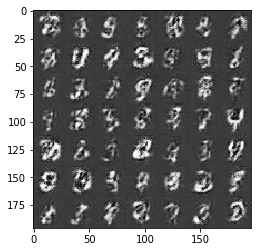

Epoch 3/5... Batch 120... Discriminator Loss: 0.5688... Generator Loss: 1.0404
Epoch 3/5... Batch 140... Discriminator Loss: 0.6115... Generator Loss: 4.0330
Epoch 3/5... Batch 160... Discriminator Loss: 0.2103... Generator Loss: 2.4992
Epoch 3/5... Batch 180... Discriminator Loss: 0.2944... Generator Loss: 4.0784
Epoch 3/5... Batch 200... Discriminator Loss: 0.1990... Generator Loss: 2.3913


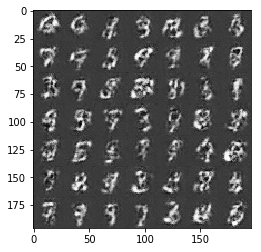

Epoch 3/5... Batch 220... Discriminator Loss: 0.2005... Generator Loss: 3.2424
Epoch 3/5... Batch 240... Discriminator Loss: 0.4480... Generator Loss: 4.9350
Epoch 3/5... Batch 260... Discriminator Loss: 0.2534... Generator Loss: 2.1461
Epoch 3/5... Batch 280... Discriminator Loss: 0.3299... Generator Loss: 7.0585
Epoch 3/5... Batch 300... Discriminator Loss: 0.5520... Generator Loss: 1.1337


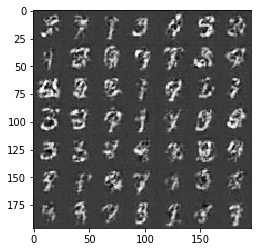

Epoch 4/5... Batch 20... Discriminator Loss: 0.1767... Generator Loss: 3.3479
Epoch 4/5... Batch 40... Discriminator Loss: 0.4478... Generator Loss: 4.9926
Epoch 4/5... Batch 60... Discriminator Loss: 0.1677... Generator Loss: 2.7357
Epoch 4/5... Batch 80... Discriminator Loss: 0.1758... Generator Loss: 3.6788
Epoch 4/5... Batch 100... Discriminator Loss: 0.1612... Generator Loss: 3.0101


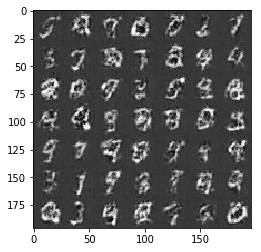

Epoch 4/5... Batch 120... Discriminator Loss: 0.2709... Generator Loss: 2.7195
Epoch 4/5... Batch 140... Discriminator Loss: 0.0970... Generator Loss: 3.9722
Epoch 4/5... Batch 160... Discriminator Loss: 0.1973... Generator Loss: 2.1609
Epoch 4/5... Batch 180... Discriminator Loss: 0.5049... Generator Loss: 1.2114
Epoch 4/5... Batch 200... Discriminator Loss: 0.1385... Generator Loss: 4.4445


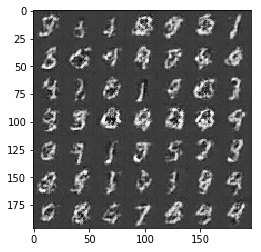

Epoch 4/5... Batch 220... Discriminator Loss: 0.3753... Generator Loss: 1.4658
Epoch 4/5... Batch 240... Discriminator Loss: 0.3409... Generator Loss: 4.4429
Epoch 4/5... Batch 260... Discriminator Loss: 0.0664... Generator Loss: 5.1169
Epoch 4/5... Batch 280... Discriminator Loss: 0.3497... Generator Loss: 1.7104
Epoch 4/5... Batch 300... Discriminator Loss: 0.3682... Generator Loss: 3.5454


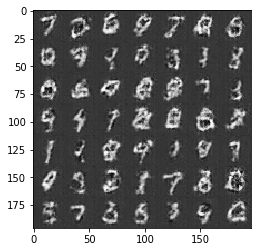

Epoch 5/5... Batch 20... Discriminator Loss: 0.0824... Generator Loss: 4.5373
Epoch 5/5... Batch 40... Discriminator Loss: 0.1529... Generator Loss: 3.1693
Epoch 5/5... Batch 60... Discriminator Loss: 0.1743... Generator Loss: 3.6819
Epoch 5/5... Batch 80... Discriminator Loss: 0.3024... Generator Loss: 1.6767
Epoch 5/5... Batch 100... Discriminator Loss: 0.2153... Generator Loss: 2.0638


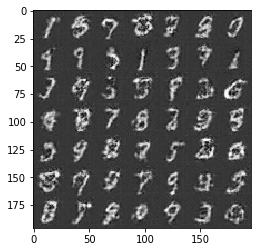

Epoch 5/5... Batch 120... Discriminator Loss: 0.5432... Generator Loss: 4.1318
Epoch 5/5... Batch 140... Discriminator Loss: 0.4011... Generator Loss: 1.5421
Epoch 5/5... Batch 160... Discriminator Loss: 0.4203... Generator Loss: 2.9140
Epoch 5/5... Batch 180... Discriminator Loss: 0.2508... Generator Loss: 4.7849
Epoch 5/5... Batch 200... Discriminator Loss: 0.8618... Generator Loss: 0.6714


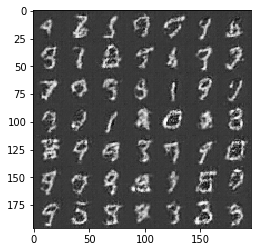

Epoch 5/5... Batch 220... Discriminator Loss: 0.2640... Generator Loss: 2.1377
Epoch 5/5... Batch 240... Discriminator Loss: 1.2641... Generator Loss: 0.4025
Epoch 5/5... Batch 260... Discriminator Loss: 0.2326... Generator Loss: 2.8494
Epoch 5/5... Batch 280... Discriminator Loss: 0.2046... Generator Loss: 2.3397
Epoch 5/5... Batch 300... Discriminator Loss: 0.4005... Generator Loss: 1.7415


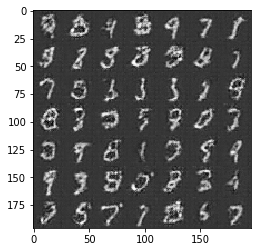

In [25]:
batch_size = 200
z_dim = 100
learning_rate = 0.0002
alpha = 0.2
beta1 = 0.5
numImagesOutput = 50
printLossEvery = 20
showOutputEvery = 100

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
#epochs = 2
# Just want to see better pictures evolve :) 
epochs = 5

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

data_shape: (202599, 28, 28, 3)
data_image_mode: RGB
data_shape: (202599, 28, 28, 3)
data_image_mode: RGB
Epoch 1/1... Batch 20... Discriminator Loss: 3.9293... Generator Loss: 0.0660
Epoch 1/1... Batch 40... Discriminator Loss: 2.9914... Generator Loss: 0.2335
Epoch 1/1... Batch 60... Discriminator Loss: 1.7816... Generator Loss: 0.9121
Epoch 1/1... Batch 80... Discriminator Loss: 1.1351... Generator Loss: 0.9668
Epoch 1/1... Batch 100... Discriminator Loss: 0.9383... Generator Loss: 0.9657


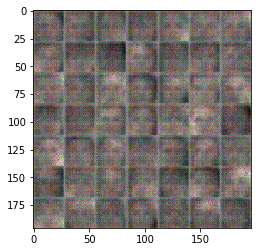

Epoch 1/1... Batch 120... Discriminator Loss: 0.4321... Generator Loss: 1.6138
Epoch 1/1... Batch 140... Discriminator Loss: 0.4162... Generator Loss: 2.6886
Epoch 1/1... Batch 160... Discriminator Loss: 2.1187... Generator Loss: 0.1557
Epoch 1/1... Batch 180... Discriminator Loss: 0.3758... Generator Loss: 1.6835
Epoch 1/1... Batch 200... Discriminator Loss: 2.1328... Generator Loss: 0.1625


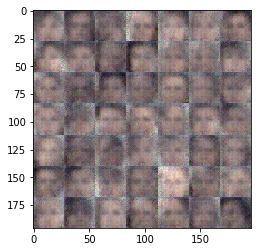

Epoch 1/1... Batch 220... Discriminator Loss: 0.3512... Generator Loss: 1.7536
Epoch 1/1... Batch 240... Discriminator Loss: 1.2995... Generator Loss: 0.3696
Epoch 1/1... Batch 260... Discriminator Loss: 1.9121... Generator Loss: 0.2274
Epoch 1/1... Batch 280... Discriminator Loss: 0.1147... Generator Loss: 4.6008
Epoch 1/1... Batch 300... Discriminator Loss: 1.7518... Generator Loss: 0.5871


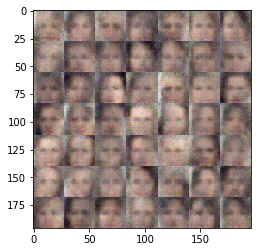

Epoch 1/1... Batch 320... Discriminator Loss: 0.3405... Generator Loss: 2.2272
Epoch 1/1... Batch 340... Discriminator Loss: 0.7317... Generator Loss: 2.2728
Epoch 1/1... Batch 360... Discriminator Loss: 2.0300... Generator Loss: 0.1840
Epoch 1/1... Batch 380... Discriminator Loss: 1.4567... Generator Loss: 0.4542
Epoch 1/1... Batch 400... Discriminator Loss: 1.0195... Generator Loss: 0.8099


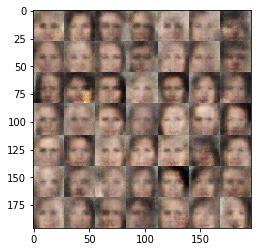

Epoch 1/1... Batch 420... Discriminator Loss: 0.4456... Generator Loss: 6.0612
Epoch 1/1... Batch 440... Discriminator Loss: 0.3886... Generator Loss: 1.9583
Epoch 1/1... Batch 460... Discriminator Loss: 0.2773... Generator Loss: 5.4289
Epoch 1/1... Batch 480... Discriminator Loss: 0.4935... Generator Loss: 2.5821
Epoch 1/1... Batch 500... Discriminator Loss: 0.9959... Generator Loss: 0.5906


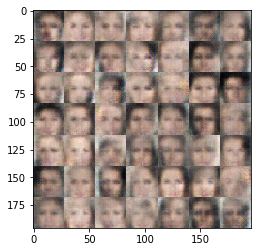

Epoch 1/1... Batch 520... Discriminator Loss: 0.3620... Generator Loss: 2.7082
Epoch 1/1... Batch 540... Discriminator Loss: 2.0569... Generator Loss: 0.1766
Epoch 1/1... Batch 560... Discriminator Loss: 0.2545... Generator Loss: 4.6817
Epoch 1/1... Batch 580... Discriminator Loss: 1.6377... Generator Loss: 0.2938
Epoch 1/1... Batch 600... Discriminator Loss: 0.3242... Generator Loss: 5.2567


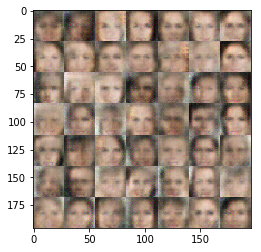

Epoch 1/1... Batch 620... Discriminator Loss: 0.2667... Generator Loss: 2.5873
Epoch 1/1... Batch 640... Discriminator Loss: 1.5693... Generator Loss: 0.2867
Epoch 1/1... Batch 660... Discriminator Loss: 0.8576... Generator Loss: 0.8555
Epoch 1/1... Batch 680... Discriminator Loss: 0.2431... Generator Loss: 3.4680
Epoch 1/1... Batch 700... Discriminator Loss: 0.5235... Generator Loss: 6.3410


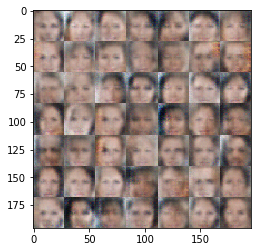

Epoch 1/1... Batch 720... Discriminator Loss: 0.3087... Generator Loss: 3.5003
Epoch 1/1... Batch 740... Discriminator Loss: 0.2326... Generator Loss: 3.0273
Epoch 1/1... Batch 760... Discriminator Loss: 0.4659... Generator Loss: 4.3138
Epoch 1/1... Batch 780... Discriminator Loss: 0.2437... Generator Loss: 4.6887
Epoch 1/1... Batch 800... Discriminator Loss: 0.4392... Generator Loss: 2.0992


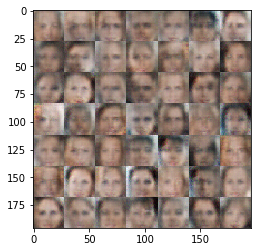

Epoch 1/1... Batch 820... Discriminator Loss: 1.0363... Generator Loss: 7.0318
Epoch 1/1... Batch 840... Discriminator Loss: 0.3934... Generator Loss: 2.6935
Epoch 1/1... Batch 860... Discriminator Loss: 0.9967... Generator Loss: 0.8814
Epoch 1/1... Batch 880... Discriminator Loss: 0.2367... Generator Loss: 6.1999
Epoch 1/1... Batch 900... Discriminator Loss: 0.5057... Generator Loss: 1.4061


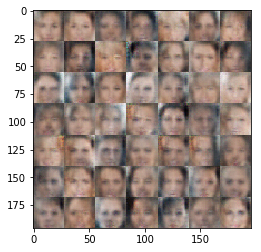

Epoch 1/1... Batch 920... Discriminator Loss: 0.3987... Generator Loss: 2.0179
Epoch 1/1... Batch 940... Discriminator Loss: 0.9493... Generator Loss: 0.7197
Epoch 1/1... Batch 960... Discriminator Loss: 0.2568... Generator Loss: 4.6895
Epoch 1/1... Batch 980... Discriminator Loss: 0.3634... Generator Loss: 2.7890
Epoch 1/1... Batch 1000... Discriminator Loss: 0.7953... Generator Loss: 1.8560


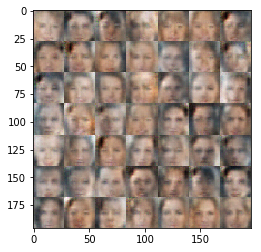

In [27]:
batch_size = 200
z_dim = 100
learning_rate = 0.0002
alpha = 0.2
beta1 = 0.5
numImagesOutput = 50
printLossEvery = 20
showOutputEvery = 100

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.